In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:

# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}/drive/Mydrive/Main_project/ultralytics
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/drive/Mydrive/Main_project/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 250MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 45.7MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 313.3ms
Speed: 17.3ms preprocess, 313.3ms inference, 24.5ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


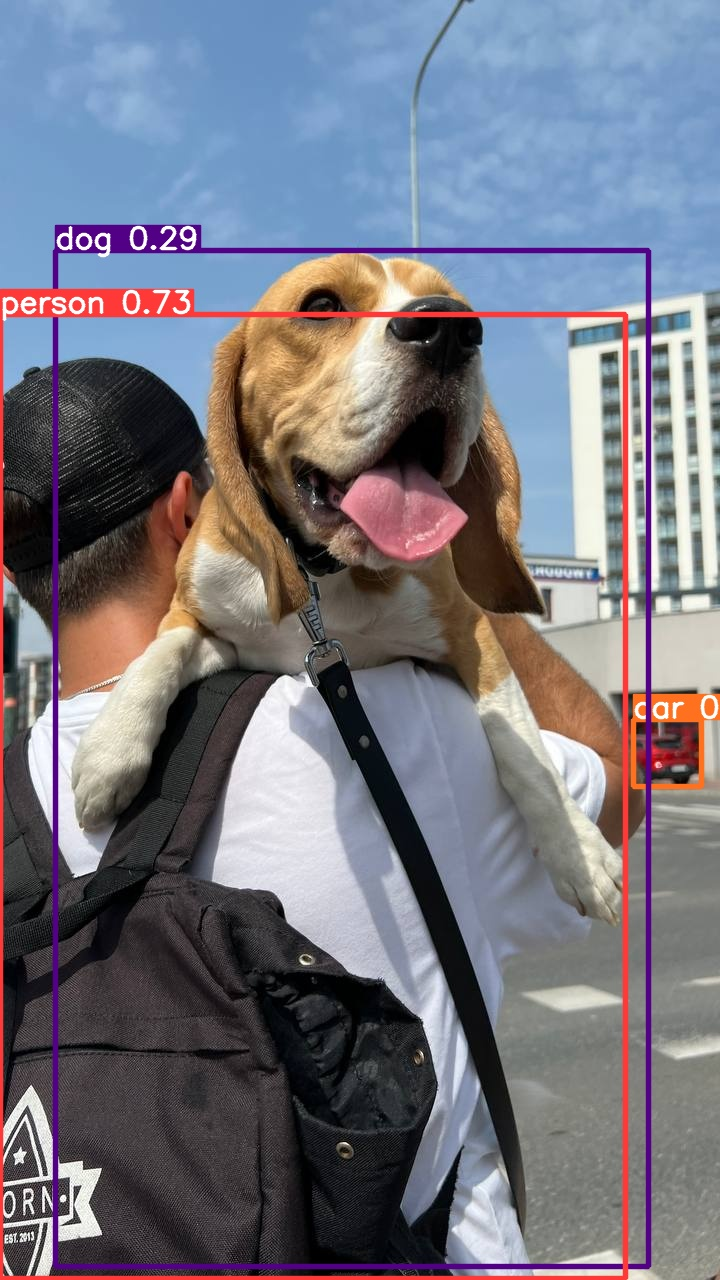

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/mydrive


In [ ]:
!mkdir {HOME}/drive/MyDrive/Datasets
%cd {HOME}/drive/MyDrive/Datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NAG72iBrd01kLwPL5eMn")
project = rf.workspace("barasha").project("vehicle-detcting-and-counting")
dataset = project.version(1).download("yolov8")



/content/drive/MyDrive/Datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Fo

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Vehicle-detcting-and-counting-1 in yolov8:: 100%|██████████| 1578/1578 [00:12<00:00, 127.60it/s]


In [ ]:
#!mkdir {HOME}/datasets
#%cd {HOME}/datasets

#!unzip /content/gdrive/MyDrive/Objectdetect.zip

/content/datasets
unzip:  cannot find or open /content/gdrive/MyDrive/Objectdetect.zip, /content/gdrive/MyDrive/Objectdetect.zip.zip or /content/gdrive/MyDrive/Objectdetect.zip.ZIP.


## Custom Training

In [ ]:
%cd {HOME}/drive/MyDrive/Datasets

!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/Datasets/Vehicle-detcting-and-counting-1/data.yaml epochs=30 imgsz=800 plots=True

/content/drive/MyDrive/Datasets
100% 6.23M/6.23M [00:00<00:00, 94.4MB/s]
New https://pypi.org/project/ultralytics/8.1.19 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Datasets/Vehicle-detcting-and-counting-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, s

In [ ]:
!ls {HOME}/content/drive/MyDrive/Datasets/runs/detect/train/weights

ls: cannot access '/content/content/drive/MyDrive/Datasets/runs/detect/train/weights': No such file or directory


/content/drive/MyDrive/Datasets/runs/detect/train


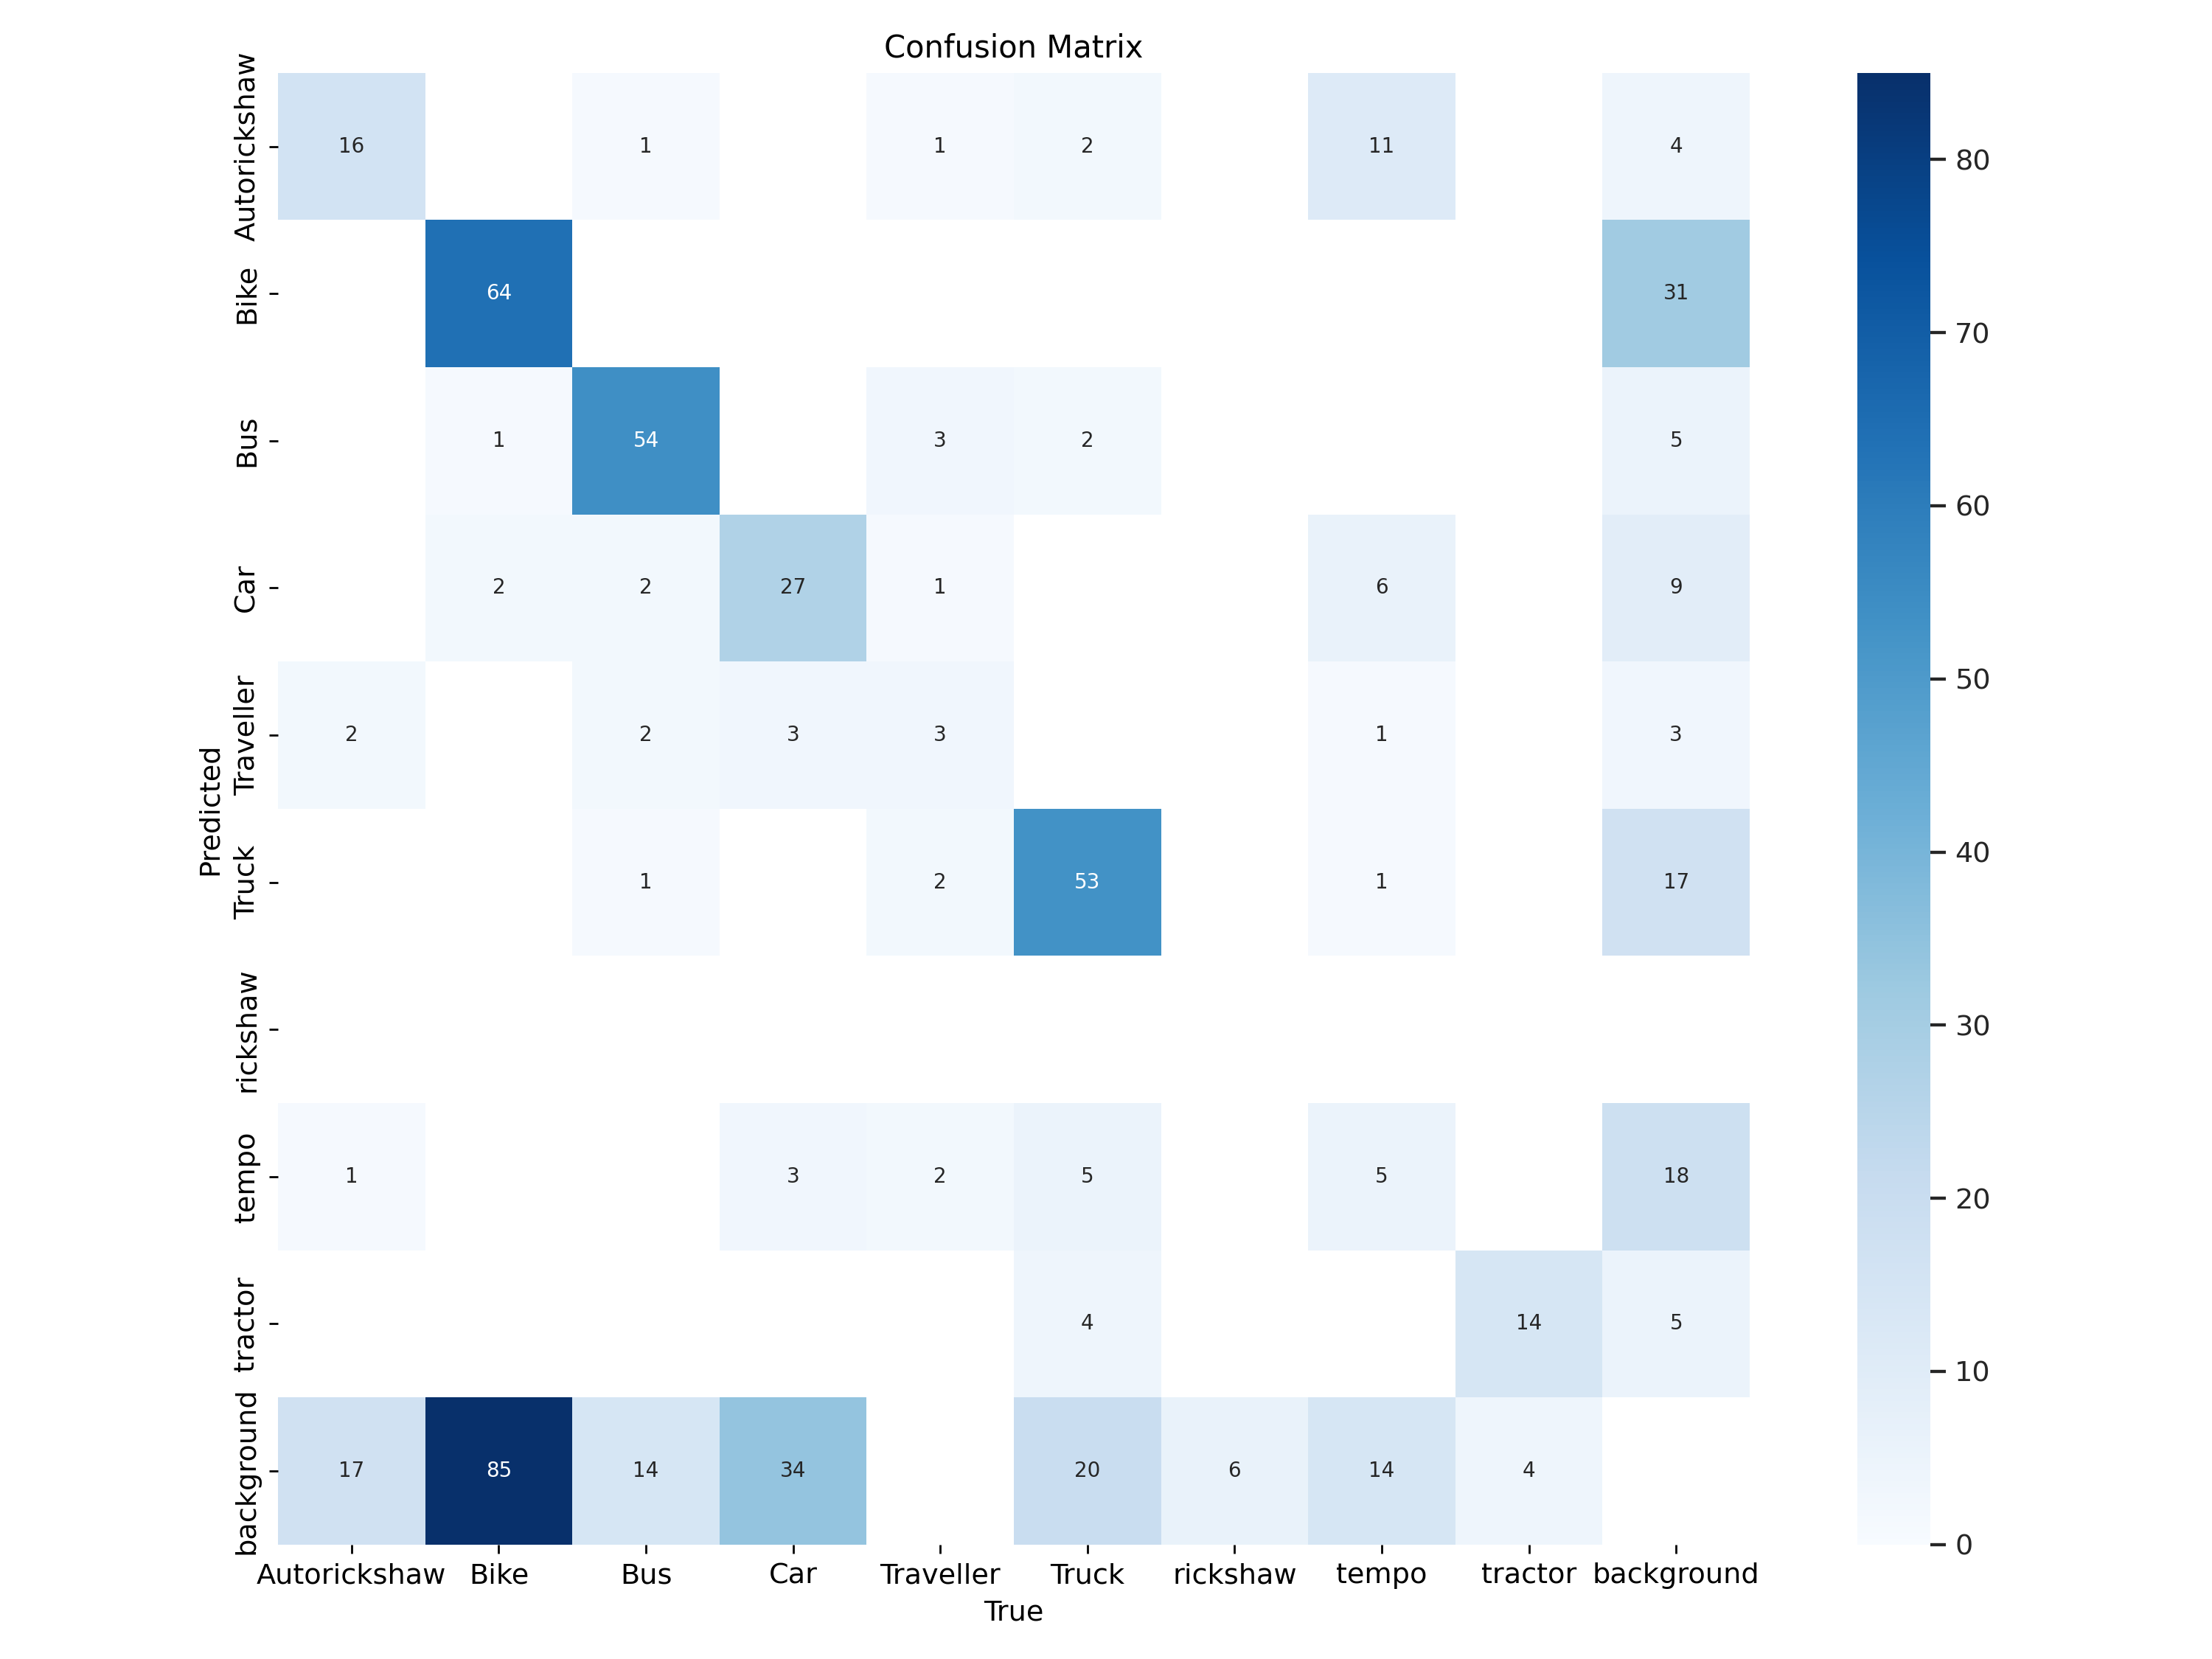

In [ ]:
%cd {HOME}/drive/MyDrive/Datasets/runs/detect/train
Image(filename=f'{HOME}/drive/MyDrive/Datasets/runs/detect/train/confusion_matrix.png', width=600)

/content/drive/MyDrive/Datasets/runs/detect/train


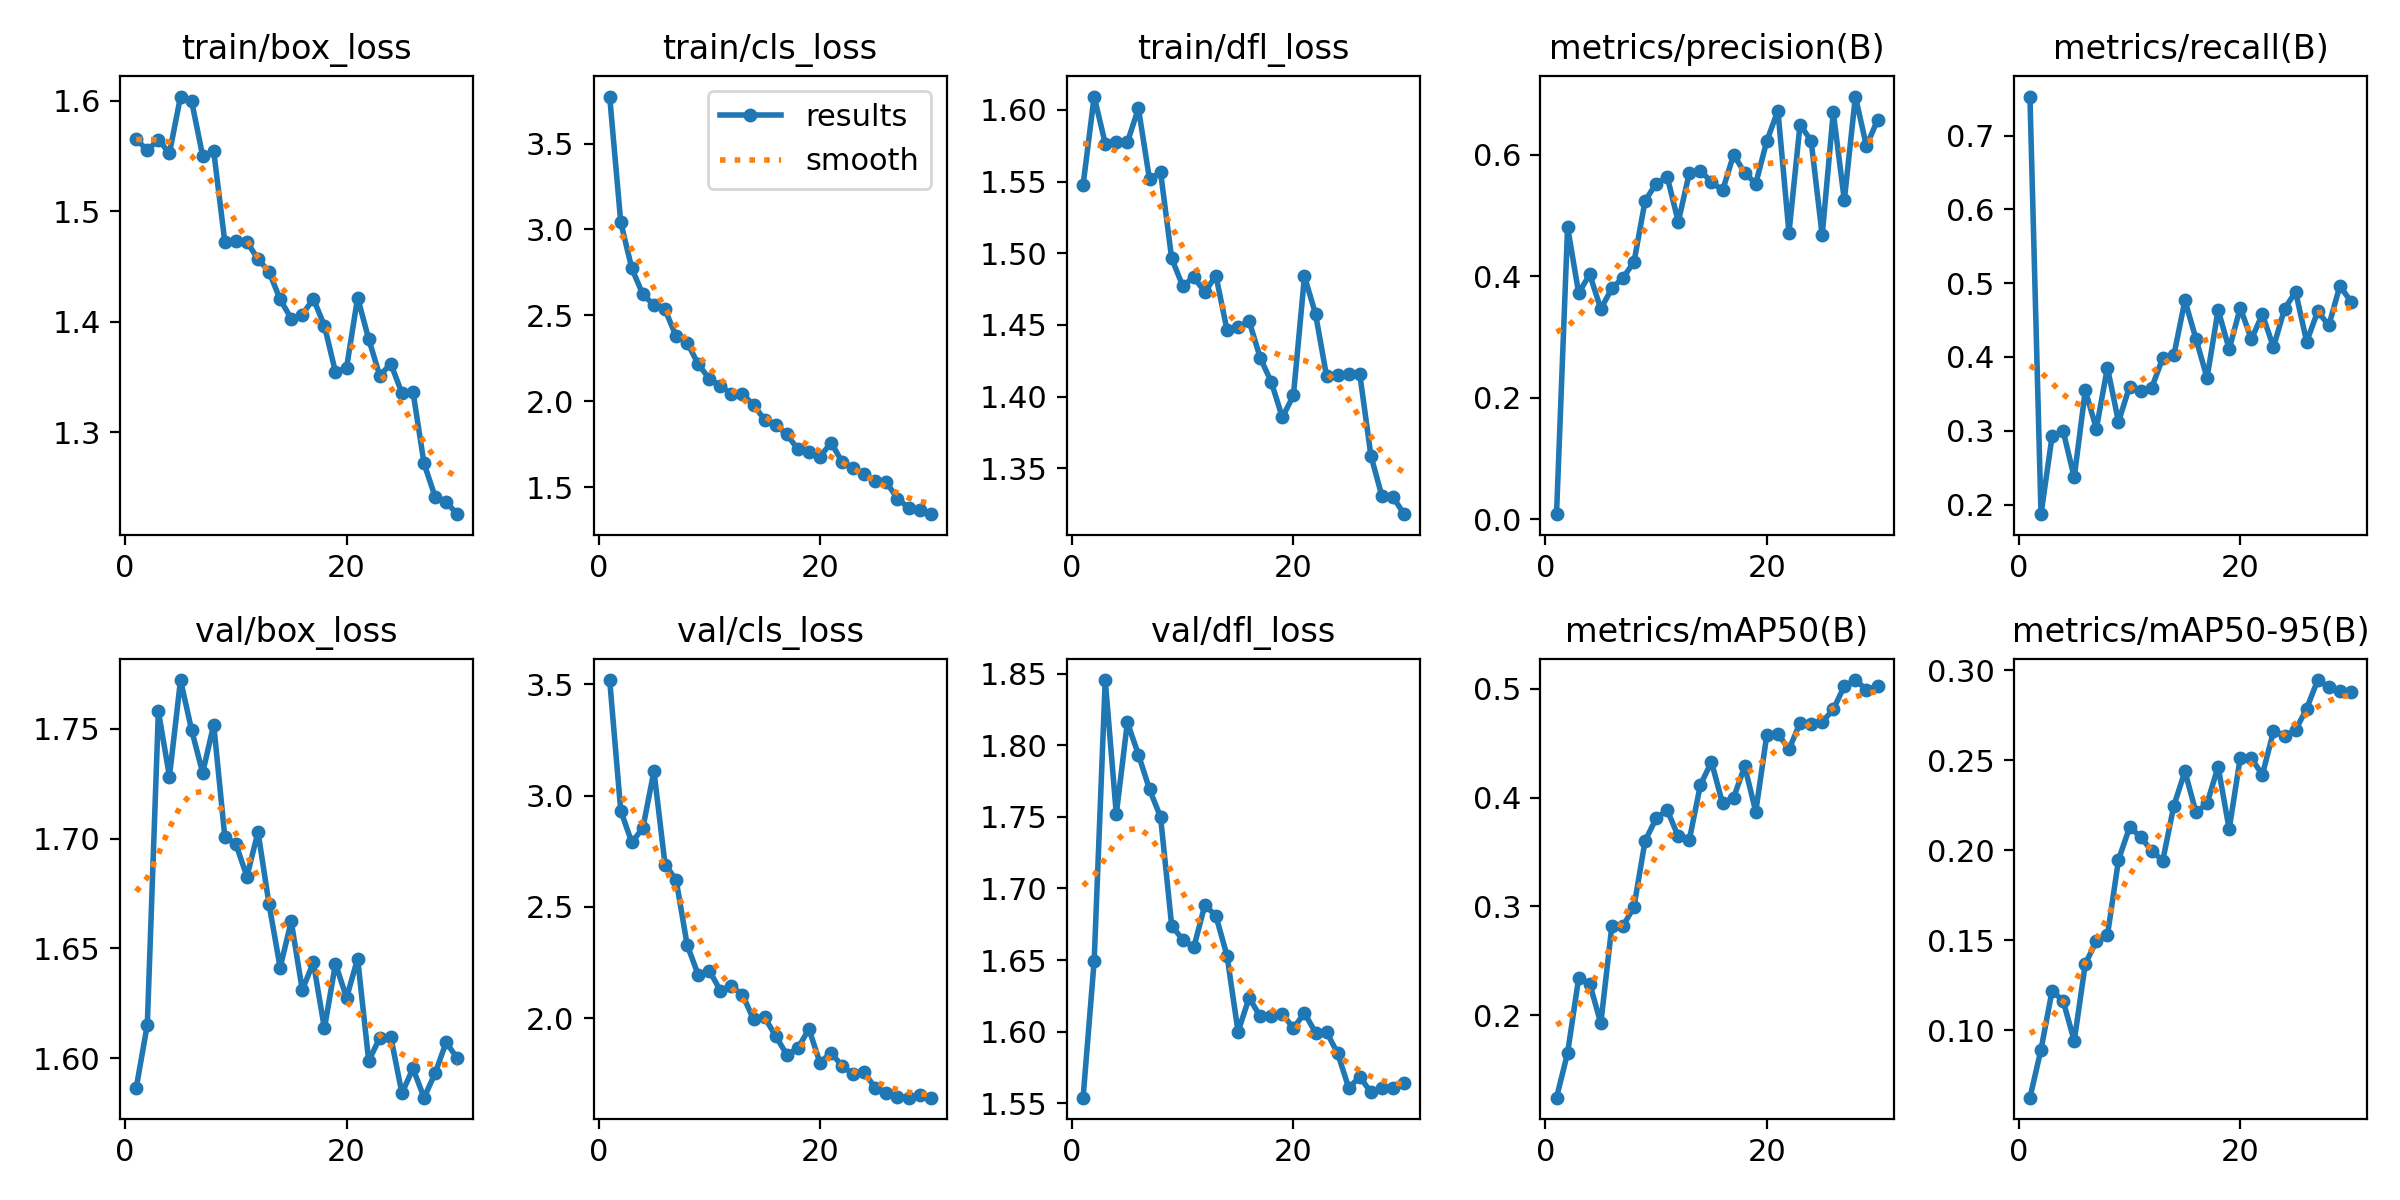

In [ ]:
%cd {HOME}/drive/MyDrive/Datasets/runs/detect/train
Image(filename=f'{HOME}/drive/MyDrive/Datasets/runs/detect/train/results.png', width=600)

/content/drive/MyDrive/Datasets/runs/detect/train


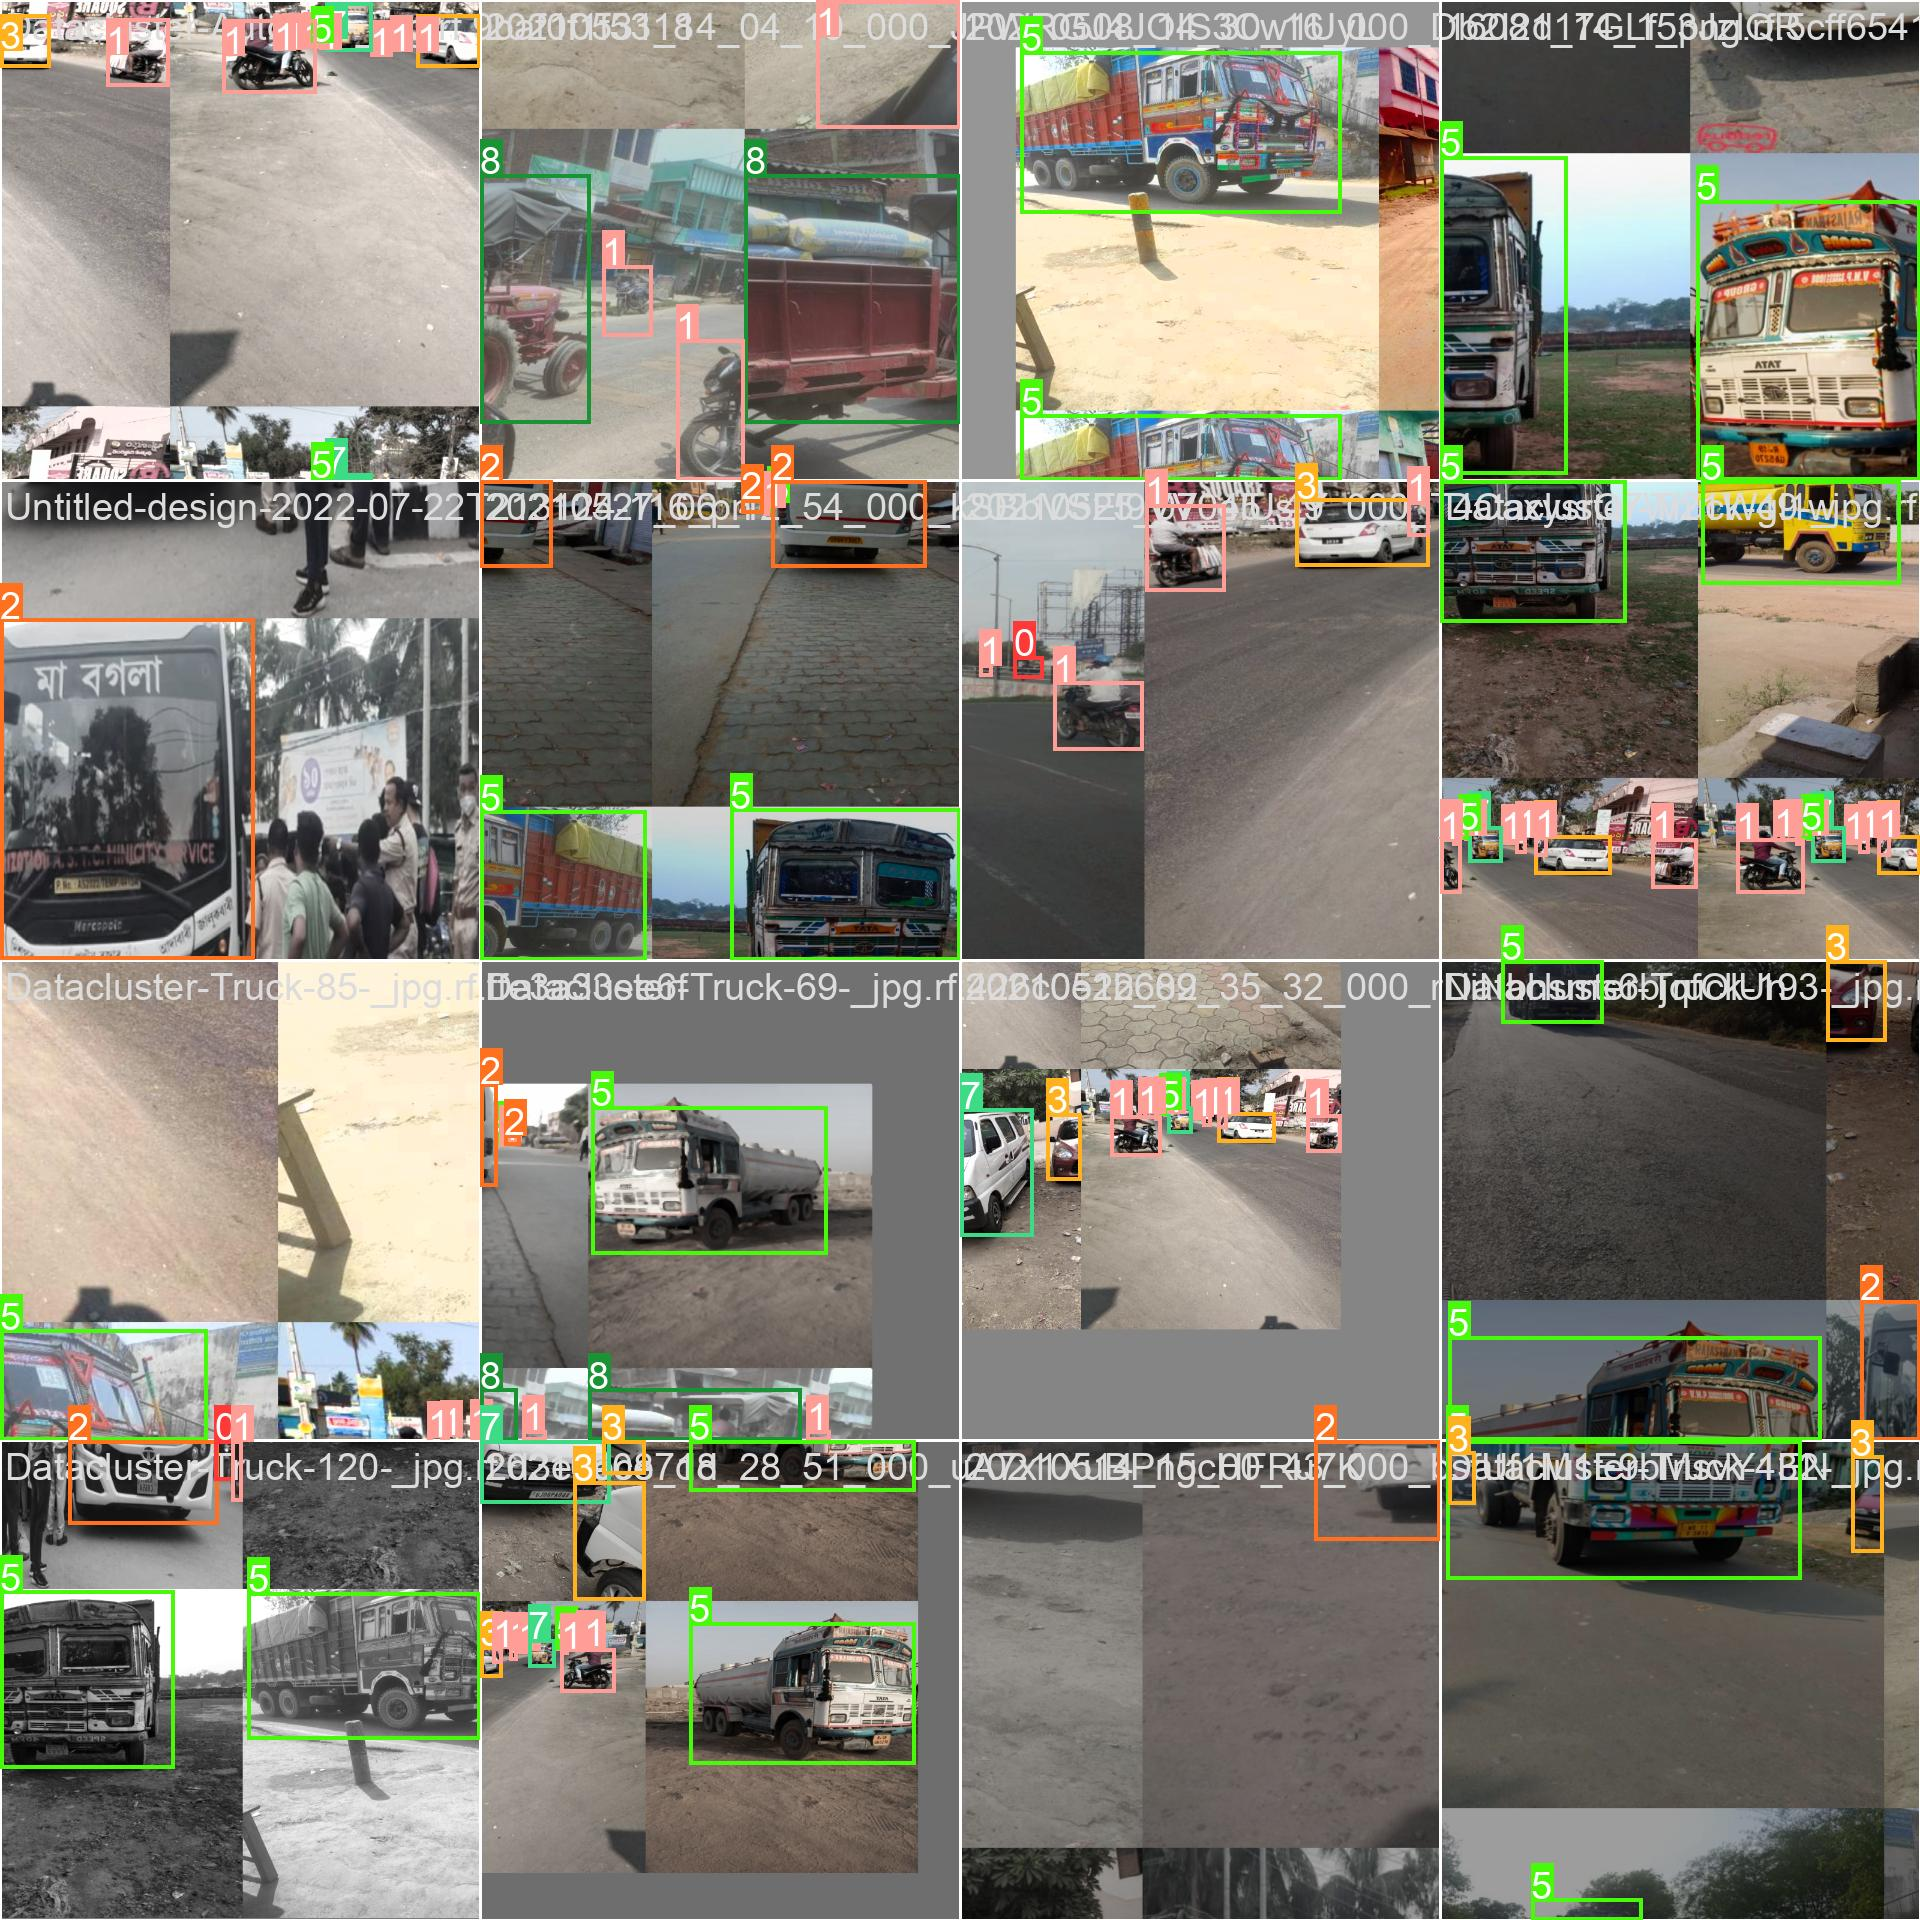

In [ ]:
%cd {HOME}/drive/MyDrive/Datasets/runs/detect/train
Image(filename=f'{HOME}/drive/MyDrive/Datasets/runs/detect/train/train_batch1.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}/drive/MyDrive/Datasets

!yolo task=detect mode=val model={HOME}/drive/MyDrive/Datasets/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/Datasets/Vehicle-detcting-and-counting-1/data.yaml

/content/drive/MyDrive/Datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Datasets/Vehicle-detcting-and-counting-1/valid/labels.cache... 157 images, 1 backgrounds, 0 corrupt: 100% 157/157 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:07<00:00,  1.28it/s]
                   all        157        489      0.525      0.462      0.503      0.295
          Autorickshaw        157         36       0.47      0.443      0.486      0.343
                  Bike        157        152      0.656      0.395      0.442      0.172
                   Bus        157         74      0.847       0.73       0.83      0.548
                   Car        157         67      0.633      0.433      0.448      0.232
             Traveller        157         12      0.363      0

## Inference with Custom Model

In [ ]:
%cd {HOME}/drive/MyDrive/Datasets
!yolo task=detect mode=predict model={HOME}/drive/MyDrive/Datasets/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Datasets/Vehicle-detcting-and-counting-1/test/images save=True

/content/drive/MyDrive/Datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs

image 1/78 /content/drive/MyDrive/Datasets/Vehicle-detcting-and-counting-1/test/images/16081_14_3_png.rf.e89adbd2f655a1856f0a0d30e1f78493.jpg: 800x800 1 Bus, 1 Traveller, 10.5ms
image 2/78 /content/drive/MyDrive/Datasets/Vehicle-detcting-and-counting-1/test/images/16081_244_1_png.rf.8fc3fb71d4fbf47f0a0dd2820d03f65d.jpg: 800x800 3 Buss, 10.4ms
image 3/78 /content/drive/MyDrive/Datasets/Vehicle-detcting-and-counting-1/test/images/20210427_12_52_47_000_pgmtGnyv84hd7BiNoFr7ALIRzeZ2_F_4160_3120_jpg.rf.7587324daf4ccd77af2524fae74f31b0.jpg: 800x800 2 Buss, 10.1ms
image 4/78 /content/drive/MyDrive/Datasets/Vehicle-detcting-and-counting-1/test/images/20210427_22_52_25_000_Db2I2d17GLf53JzlQRSP28hD4Ml1_F_2592_1944_jpg.rf.8cab5d4fe147e72f0f8e052f3058760e.jpg: 800x800 1 Traveller, 10.1ms
image 5/78 /co

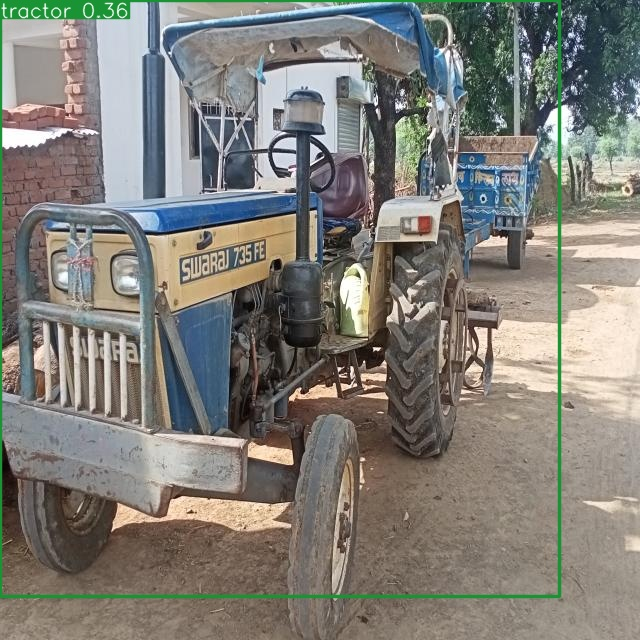

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/drive/MyDrive/Datasets/runs/detect/predict/20210602_08_21_08_000_mYLsED0vw1bH5NtJsBysApxRKir1_T_2448_3264_jpg.rf.90e9f30dad1dbdf7709b76b9b403b95e.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

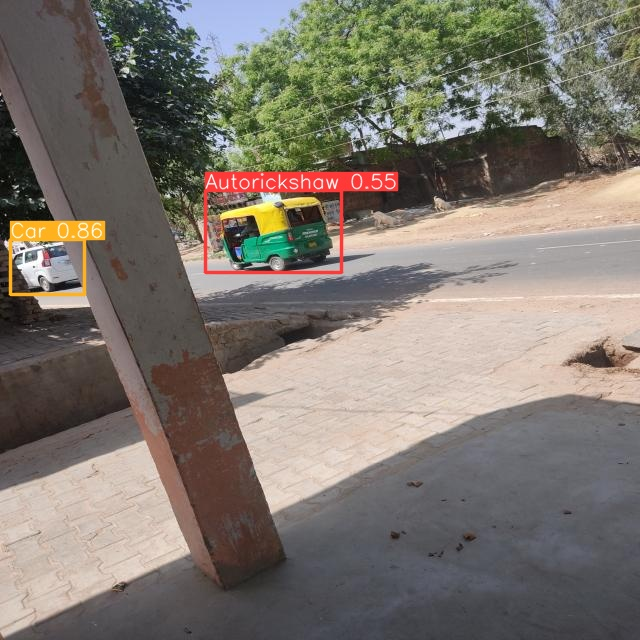

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/drive/MyDrive/Datasets/runs/detect/predict/Datacluster-Auto-77-_jpg.rf.0bf5f6f35af41e94fffda497ce06ce84.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8_custom", model_path=f"{HOME}/drive/MyDrive/Datasets/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/barasha/vehicle-detcting-and-counting/1
Share your model with the world at: https://universe.roboflow.com/barasha/vehicle-detcting-and-counting/model/1
